In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__,".."))
using LadderDGA
using OffsetArrays
using LaTeXStrings
using Plots

  Activating project at `G:\Codes\LadderDGA.jl`


In [2]:
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
#include("../examples/example05_AlDGA_Method.jl")
include("../examples/example00_lDGA.jl");

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 20


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.002598881341 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000987868174 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [7]:
AlDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env);
AlDGAhelper2 = deepcopy(AlDGAhelper);

[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 20
┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     


DBG: NOT using diagonal terms in λ₀


In [8]:
using MatsubaraFrequencies

In [9]:
νnGrid_noShell = LadderDGA.νnGrid_noShell
get_val_or_zero = LadderDGA.get_val_or_zero
#νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1
#ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
function update_ΓAsym3!(χm_loc, χd_loc, χpp_loc, sP, mP, h; inner_cut=0)
    U = mP.U
    skip = 0
    tot = 0
    for (ωi, ωn) in enumerate(-sP.n_iω:sP.n_iω)
        nGrid = νnGrid_noShell(ωn, sP)
        for (νi, νn) in enumerate(nGrid)
            for (νpi, νpn) in enumerate(nGrid)
                if abs(νn) > inner_cut && abs(νpn) > inner_cut 
                    h.Γ_d[νi, νpi, ωi] =  U
                    h.Γ_m[νi, νpi, ωi] = -U 
                    νpn_m = MatsubaraIndex(νpn, Fermi)
                    νn_m  = MatsubaraIndex(νn, Fermi)
                    ωn_m  = MatsubaraIndex(ωn, Bose)
                    i1_pre = νpn_m - νn_m
                    i2_pre = νn_m + νpn_m + ωn_m
                    i1 = (3*sP.n_iω + 0) + Integer(i1_pre)  
                    i2 = (3*sP.n_iω + 0) + Integer(i2_pre)   
                    h.Γ_d[νi, νpi, ωi] += (U^2) * get_val_or_zero(χd_loc,i1) + (3*U^2/2) * get_val_or_zero(χm_loc,i1) - (U^2) * get_val_or_zero(χpp_loc,i2) 
                    h.Γ_m[νi, νpi, ωi] += (U^2) * get_val_or_zero(χd_loc,i1) -   (U^2/2) * get_val_or_zero(χm_loc,i1) + (U^2) * get_val_or_zero(χpp_loc,i2) 
                end
            end
        end
    end
    h.Γ_d = h.Γ_d/mP.β^2
    h.Γ_m = h.Γ_m/mP.β^2
end

update_ΓAsym3! (generic function with 1 method)

In [10]:
νnGrid_noShell = LadderDGA.νnGrid_noShell
get_val_or_zero = LadderDGA.get_val_or_zero
#νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1
#ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
function update_ΓAsym2!(χm_loc, χd_loc, χpp_loc, sP, mP, h)
    U = mP.U
    h.Γ_d[:,:,:] .=  U
    h.Γ_m[:,:,:] .= -U 
    skip = 0
    tot = 0
    #for (ωi, ωn) in enumerate(-sP.n_iω:sP.n_iω)
    ωi, ωn = 151, 0
        nGrid = νnGrid_noShell(ωn, sP)
        for (νi, νn) in enumerate(nGrid)
            for (νpi, νpn) in enumerate(nGrid)
                νpn = MatsubaraIndex(νpn, Fermi)
                νn  = MatsubaraIndex(νn, Fermi)
                ωn  = MatsubaraIndex(ωn, Bose)
                i1_pre = νpn - νn
                i2_pre = νn + νpn + ωn
                i1 = (3*sP.n_iω + 0) + Integer(i1_pre)  
                i2 = (3*sP.n_iω + 0) + Integer(i2_pre)  
            if νi in [1,2] && νpi in [1,2]
                println("νn = $νn, νpn = $νpn, νpn - νn = $i1_pre -> $i1 //  νn = $νn + νpn = $νpn + ωn = $ωn = $i2_pre -> $i2")
                println((U^2/2) * get_val_or_zero(χd_loc,i1), " + ", (3*U^2/2) * get_val_or_zero(χm_loc,i1), " - ", (U^2) * get_val_or_zero(χpp_loc,i2))
                println((U^2/2) * get_val_or_zero(χd_loc,i1), " - ",   (U^2/2) * get_val_or_zero(χm_loc,i1), " + ", (U^2) * get_val_or_zero(χpp_loc,i2))
            end
            if false && νi == 1 && νpi == 300
                println("νn = $νn, νpn = $νpn, νpn - νn = $i1_pre -> $i1 //  νn = $νn + νpn = $νpn + ωn = $ωn = $i2_pre -> $i2")
                println((U^2/2) * get_val_or_zero(χd_loc,i1), " + ", (3*U^2/2) * get_val_or_zero(χm_loc,i1), " - ", (U^2) * get_val_or_zero(χpp_loc,i2))
                println((U^2/2) * get_val_or_zero(χd_loc,i1), " - ",   (U^2/2) * get_val_or_zero(χm_loc,i1), " + ", (U^2) * get_val_or_zero(χpp_loc,i2))
            end
                h.Γ_d[νi, νpi, ωi] += (U^2/2) * get_val_or_zero(χd_loc,i1) + (3*U^2/2) * get_val_or_zero(χm_loc,i1) - (U^2) * get_val_or_zero(χpp_loc,i2) 
                h.Γ_m[νi, νpi, ωi] += (U^2/2) * get_val_or_zero(χd_loc,i1) -   (U^2/2) * get_val_or_zero(χm_loc,i1) + (U^2) * get_val_or_zero(χpp_loc,i2) 
            end
        end
    #end
    h.Γ_d = h.Γ_d/mP.β^2
    h.Γ_m = h.Γ_m/mP.β^2
end

update_ΓAsym2! (generic function with 1 method)

In [11]:
χm_loc = kintegrate(lDGAhelper.kG, χm, 1)[1,:] 
χd_loc = kintegrate(lDGAhelper.kG, χd, 1)[1,:];
χm_asym_ed = vcat(reverse(real(sP.χ_helper.χsp_asympt[2:3*lDGAhelper.sP.n_iω])),real(sP.χ_helper.χsp_asympt[1:3*lDGAhelper.sP.n_iω+1]));
χd_asym_ed = vcat(reverse(real(sP.χ_helper.χch_asympt[2:3*lDGAhelper.sP.n_iω])),real(sP.χ_helper.χch_asympt[1:3*lDGAhelper.sP.n_iω+1]));
χpp_asym_ed = vcat(reverse(real(sP.χ_helper.χpp_asympt[2:3*lDGAhelper.sP.n_iω])),real(sP.χ_helper.χpp_asympt[1:3*lDGAhelper.sP.n_iω+1]));
   
update_ΓAsym3!(χm_asym_ed, χd_asym_ed, χpp_asym_ed, sP, mP, AlDGAhelper);

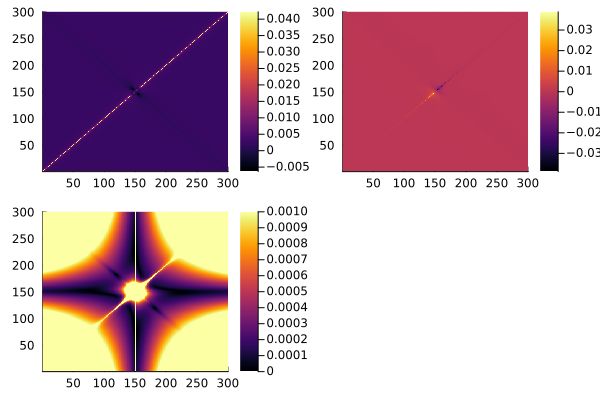

In [12]:
p1 = heatmap(real(lDGAhelper.Γ_d[:,:,155]))
p2 = heatmap(imag(lDGAhelper.Γ_d[:,:,155]))
#p3 = heatmap(real(AlDGAhelper.Γ_d[:,:,151]))
#p4 = heatmap(imag(AlDGAhelper.Γ_d[:,:,151]))
p5 = heatmap(abs.(AlDGAhelper.Γ_d[:,:,151] .- lDGAhelper.Γ_d[:,:,151]), clims=(0,0.001))
pa = plot(p1, p2,p5)

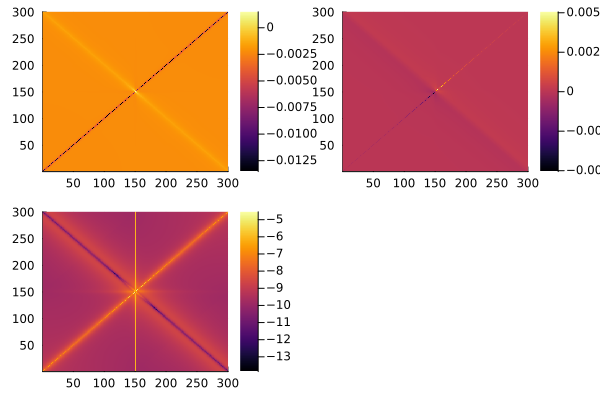

In [13]:
p1 = heatmap(real(lDGAhelper.Γ_m[:,:,151]))
p2 = heatmap(imag(lDGAhelper.Γ_m[:,:,151]))
p3 = heatmap(real(AlDGAhelper.Γ_m[:,:,151]))
p4 = heatmap(imag(AlDGAhelper.Γ_m[:,:,151]))
p5 = heatmap(log.(abs.(AlDGAhelper.Γ_m[:,:,151] .- lDGAhelper.Γ_m[:,:,151])))
pa = plot(p1, p2, p5)

In [ ]:
AlDGAhelper_i_cut = deepcopy(AlDGAhelper);
bubble_cut     = calc_bubble(:DMFT, AlDGAhelper_i_cut);
χm_i_cut, γm_i_cut = calc_χγ(:m, AlDGAhelper_i_cut, bubble_cut);
χd_i_cut, γd_i_cut = calc_χγ(:d, AlDGAhelper_i_cut, bubble_cut);
λm = 0.0 
λd = 0.0
G_ladder_it = nothing
Σ_ladder_it = nothing
converged = false
i = 0
maxit = 50
χm_list_cut = []
χd_list_cut = []
eps_val=1e-12

χpp_loc =  vcat(reverse(lDGAhelper.sP.χ_helper.χch_asympt[1:lDGAhelper.sP.n_iω]), lDGAhelper.sP.χ_helper.χch_asympt[1:lDGAhelper.sP.n_iω+1])
while i < maxit && !converged
    χm_bak = deepcopy(χm_i_cut.data) 
    χd_bak = deepcopy(χd_i_cut.data) 
    χm_loc = kintegrate(AlDGAhelper_i_cut.kG, χm_i_cut, 1)[1,:] 
    χd_loc = kintegrate(AlDGAhelper_i_cut.kG, χd_i_cut, 1)[1,:] 
    push!(χm_list_cut, χm_loc)
    push!(χd_list_cut, χd_loc)
    update_ΓAsym3!(χm_loc, χd_loc, χd_loc, sP, mP, AlDGAhelper_i_cut; inner_cut=15)
    bubble_i_cut  = calc_bubble(:DMFT, AlDGAhelper_i_cut);
    χm_i_cut, γm_i_cut = calc_χγ(:m, AlDGAhelper_i_cut, bubble_i_cut; verbose=true);
    χd_i_cut, γd_i_cut = calc_χγ(:d, AlDGAhelper_i_cut, bubble_i_cut; verbose=true);

    # λ₀ = calc_λ0(bubble_01, AlDGAhelper_01)
    λ₀_i = -AlDGAhelper_i_cut.mP.U .* deepcopy(core(bubble_i_cut));
    converged_internal, μ_it, G_ladder_it, Σ_ladder_it, tr = LadderDGA.LambdaCorrection.run_sc(χm_i_cut, γm_i_cut, χd_i_cut, γd_i_cut, λ₀_i, 0.0, 0.0, AlDGAhelper_i_cut;
                    maxit=100, mixing=0.2, conv_abs=1e-8)
    G_fft_i, G_rfft_i = G_fft(G_ladder_it, AlDGAhelper_i_cut.kG, AlDGAhelper_i_cut.sP)
    AlDGAhelper_i_cut.gLoc_fft = G_fft_i
    AlDGAhelper_i_cut.gLoc_rfft = G_rfft_i
    sum(abs.(χm_i_cut.data .- χm_bak)) < eps_val && sum(abs.(χd_i_cut.data .- χd_bak)) < eps_val && (converged = true)
    i += 1
    @info "[it=$i]: Δm =" sum(abs.(χm_i_cut.data .- χm_bak)) " // Δd =" sum(abs.(χd_i_cut.data .- χd_bak))
end

[ Info: m channel: |∑χ(q=0,ω≠0)| = 1039.13710021227 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 21.875616507527 ≟ 0
[ Info: m channel: |∑χ(q=0,ω≠0)| = 5.480284529937 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 3.731908800933 ≟ 0
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Info: [it=1]: Δm =
│   sum(abs.(χm_i_cut.data .- χm_bak)) = 2749.969683611259
│    // Δd = = " // Δd ="
└   sum(abs.(χd_i_cut.data .- χd_bak)) = 1264.9635811933547
[ Info: m channel: |∑χ(q=0,ω≠0)| = 19.880814419897 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 14.690440177418 ≟ 0
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warni

In [17]:
AlDGAhelper_i = deepcopy(AlDGAhelper);
bubble = nothing
χm_i = nothing
γm_i = nothing
χd_i = nothing
γd_i = nothing
λm = 0.0 
λd = 0.0
G_ladder_it = nothing
Σ_ladder_it = nothing
converged = false
i = 0
maxit = 4
χm_list = []
χd_list = []
Σ_list  = []
eps_val=1e-12

χpp_loc =  vcat(reverse(lDGAhelper.sP.χ_helper.χch_asympt[1:lDGAhelper.sP.n_iω]), lDGAhelper.sP.χ_helper.χch_asympt[1:lDGAhelper.sP.n_iω+1])
while i < maxit && !converged
    if i > 1
        χm_bak = deepcopy(χm_i.data) 
        χd_bak = deepcopy(χd_i.data) 
    end
    bubble_i  = calc_bubble(:DMFT, AlDGAhelper_i);
    χm_i, γm_i = calc_χγ(:m, AlDGAhelper_i, bubble_i; verbose=true);
    χd_i, γd_i = calc_χγ(:d, AlDGAhelper_i, bubble_i; verbose=true);

    # λ₀ = calc_λ0(bubble_01, AlDGAhelper_01)
    λ₀_i = -AlDGAhelper_i.mP.U .* deepcopy(core(bubble_i));
    #res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm_i,γm_i,χd_i, γd_i,λ₀, lDGAhelper; tc=ΣTail_EoM)
    #res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm_i,γm_i,χd_i, γd_i,λ₀, AlDGAhelper_i; tc=ΣTail_Plain,verbose=true,verbose_sc=false,max_steps_sc=200,mixing=0.1)
    converged_internal, μ_it, G_ladder_it, Σ_ladder_it, tr = LadderDGA.LambdaCorrection.run_sc(χm_i, γm_i, χd_i, γd_i, λ₀_i, 0.0, 0.0, AlDGAhelper_i;
                    maxit=100, mixing=0.2, conv_abs=1e-8, tc=ΣTail_Plain)
    #G_ladder_it = res_dm_sc.G_ladder
    push!(Σ_list, deepcopy(Σ_ladder_it))
    G_fft_i, G_rfft_i = G_fft(G_ladder_it, AlDGAhelper_i_cut.kG, AlDGAhelper_i_cut.sP)
    #χ_λ!(χm_i, res_dm.λm)
    #χ_λ!(χd_i, res_dm.λd)

    χm_loc = kintegrate(lDGAhelper.kG, χm_i, 1)[1,:] 
    χd_loc = kintegrate(lDGAhelper.kG, χd_i, 1)[1,:] 
    push!(χm_list, χm_loc)
    push!(χd_list, χd_loc)
    update_ΓAsym3!(χm_loc, χd_loc, χd_loc, sP, mP, AlDGAhelper_i)
    
    AlDGAhelper_i.gLoc_fft = G_fft_i
    AlDGAhelper_i.gLoc_rfft = G_rfft_i
    
    if i > 1
        sum(abs.(χm_i.data .- χm_bak)) < eps_val && sum(abs.(χd_i.data .- χd_bak)) < eps_val && (converged = true)
        @info "[it=$i]: Δm =" sum(abs.(χm_i.data .- χm_bak)) " // Δd =" sum(abs.(χd_i.data .- χd_bak))
    end
    i += 1
end

[ Info: m channel: |∑χ(q=0,ω≠0)| = 8.9107608658 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 13.007292349712 ≟ 0
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
[ Info: m channel: |∑χ(q=0,ω≠0)| = 2.685873674729 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 3.045268297093 ≟ 0
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ Ladder

In [ ]:
res_dm_sc

In [107]:
res_m =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)
res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)
res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,verbose=true,verbose_sc=false,max_steps_sc=200,mixing=0.1)

λm=0.8809953414857384, λd=-9.621375913423, ΔEPot = 0.100703081153427 - 0.9319017332624563 = -0.8311986521090293
λm=-0.015634614363183176, λd=200.0, ΔEPot = 0.10450721719471256 - 0.02828482400472543 = 0.07622239318998714
λm=-0.004706030742783682, λd=0.0, ΔEPot = 0.11984801785391024 - 0.1269281777966968 = -0.00708015994278656
λm=-0.010282656857732012, λd=16.998662529590604, ΔEPot = 0.11282114446799689 - 0.07948460878967961 = 0.03333653567831728
λm=-0.0058609747820988906, λd=1.8144551846255546, ΔEPot = 0.1184727804936665 - 0.1175121299429911 = 0.0009606505506754015
λm=-0.00565385167030423, λd=1.4535323450299957, ΔEPot = 0.11872196424228716 - 0.11921515096273161 = -0.0004931867204444468
λm=-0.005725226735858915, λd=1.5759685730244264, ΔEPot = 0.11863622538261794 - 0.11862901031197415 = 7.215070643787347e-6
λm=-0.005724205869603927, λd=1.5742032195623263, ΔEPot = 0.11863745265394296 - 0.11863739914163829 = 5.35123046707664e-8
λm=-0.005724198241461059, λd=1.5741900300018574, ΔEPot = 0.118637

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = -0.00572420, λd = 1.57419003, μ = 0.94499993                           │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.11863745,  Epot_2  =  0.11863746,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.20482656,  Ekin_2  = -0.20903607,  Δ = 1.0171%                 │
│  χ_m    =  0.43969760,  χ_m_loc = 0.43558908,  Δ = 0.4694%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


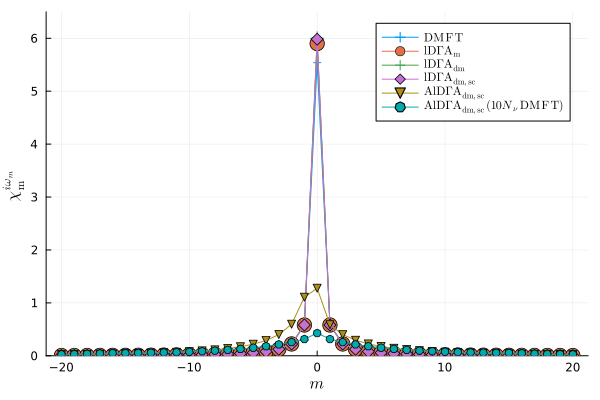

In [101]:
xr_i = 131:171
xr = -20:20
plot(xr,kintegrate(lDGAhelper.kG,χm,1)[1,xr_i], markershape=:auto, label=L"\mathrm{DMFT}", ylims=(0,6.5), xlabel=L"m", ylabel=L"\chi^{i \omega_m}_{\mathrm{m}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_m.λm),1)[1,xr_i], markershape=:auto, markersize=8, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{m}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_dm.λm),1)[1,xr_i], markershape=:auto, markersize=7, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_dm_sc.λm),1)[1,xr_i], markershape=:auto, markersize=6, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
#plot!(xr,χm_list[2][xr_i], markershape=:auto)
#plot!(xr,χm_list[3][xr_i], markershape=:auto)
plot!(xr,χm_list[end][xr_i], markershape=:auto, label=L"\mathrm{AlD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(xr,χm_list_cut[end][xr_i], markershape=:auto, label=L"\mathrm{AlD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}\,(10N_\nu\,\mathrm{DMFT})")

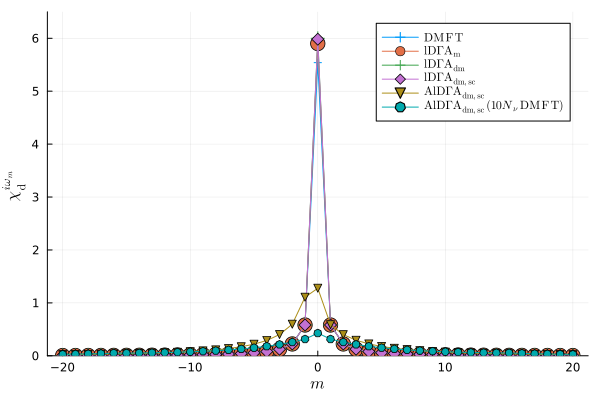

In [102]:
xr_i = 131:171
xr = -20:20
plot(xr,kintegrate(lDGAhelper.kG,χm,1)[1,xr_i], markershape=:auto, label=L"\mathrm{DMFT}", ylims=(0,6.5), xlabel=L"m", ylabel=L"\chi^{i \omega_m}_{\mathrm{d}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_m.λm),1)[1,xr_i], markershape=:auto, markersize=8, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{m}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_dm.λm),1)[1,xr_i], markershape=:auto, markersize=7, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}")
plot!(xr,kintegrate(lDGAhelper.kG,χ_λ(χm,res_dm_sc.λm),1)[1,xr_i], markershape=:auto, markersize=6, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
#plot!(xr,χm_list[2][xr_i], markershape=:auto)
#plot!(xr,χm_list[3][xr_i], markershape=:auto)
plot!(xr,χm_list[end][xr_i], markershape=:auto, label=L"\mathrm{AlD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(xr,χm_list_cut[end][xr_i], markershape=:auto, label=L"\mathrm{AlD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}\,(10N_\nu\,\mathrm{DMFT})")

AlDGAhelper = setup_ALDGA(kGridsStr[1], mP, sP, env);
converged_internal, μ_it, G_ladder_it, Σ_ladder_it, tr = LadderDGA.LambdaCorrection.run_sc(χm, γm, χd, γd, λ₀, 0.0, 0.0, AlDGAhelper; maxit=100, mixing=0.2, conv_abs=1e-8)

In [7]:
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env);

[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10
┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     


DBG: NOT using diagonal terms in λ₀


In [8]:
AlDGAhelper.gLoc_rfft

10×10×1201 OffsetArray(::Array{ComplexF64, 3}, 1:10, 1:10, -600:600) with eltype ComplexF64 with indices 1:10×1:10×-600:600:
[:, :, -600] =
  -0.00272539+0.796367im     …   -0.00158546-1.27459e-5im
  -0.00158546-1.27459e-5im      -0.000317029-8.2308e-6im
  0.000158595-2.32358e-6im        2.57102e-8-6.30995e-7im
 -1.01011e-11+6.31432e-7im        -1.0336e-9+1.2632e-7im
  -1.71852e-9-3.15837e-8im      -5.65639e-10-1.205e-11im
  3.77246e-10-6.14815e-12im  …   7.55238e-11-2.28987e-12im
  -1.71852e-9-3.15837e-8im      -5.65639e-10-1.205e-11im
 -1.01011e-11+6.31432e-7im        -1.0336e-9+1.2632e-7im
  0.000158595-2.32358e-6im        2.57102e-8-6.30995e-7im
  -0.00158546-1.27459e-5im      -0.000317029-8.2308e-6im

[:, :, -599] =
   -0.0027345+0.797697im     …   -0.00159076-1.28099e-5im
  -0.00159076-1.28099e-5im      -0.000318089-8.27211e-6im
  0.000159126-2.33524e-6im        2.58824e-8-6.34161e-7im
 -1.01703e-11+6.34602e-7im       -1.04052e-9+1.26955e-7im
  -1.73003e-9-3.17423e-8im      -5.69

In [9]:
kintegrate(lDGAhelper.kG, χm, 1)

1×301 Matrix{Float64}:
 0.000275501  0.000279021  0.000282603  …  0.000279017  0.000275501

In [12]:
iν_array = LadderDGA.iν_array
mP = AlDGAhelper.mP
Σ_loc = AlDGAhelp
iν = iν_array(mP.β, collect(axes(Σ_ladder, 2)))
tc_factor = tail_factor(tc, mP.U, mP.β, mP.n, Σ_loc, iν)
tc_term   = tail_correction_term(sum_kω(kG, χm), χ_m_sum, tc_factor)

LoadError: UndefVarError: `AlDGAhelp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.